# Statystyka matematyczna - ćwiczenia laboratoryjne

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

# Zestaw zadań 2: Rozkłady zmiennych losowych ciągłych

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Funkcje do wykorzystania

In [4]:
def vizualize_continuous_distribution(pdf, cdf, interval=None):
    """
    Parameters
    -------
    pdf: pandas.DataFrame
        Tablica zawierająca index z wariantami zmiennej losowej i nadaną nazwą zmiennej (np. x) oraz pojedynczą kolumnę
        z wartościami gęstościami prawdopodobieństwa wyliczonymi dla poszczególnych wariantów o nadanej nazwie bazującej na nazwie zmiennej (np. f(x)).
    cdf: pandas.DataFrame
        Tablica zawierająca index z wariantami zmiennej losowej i nadaną nazwą zmiennej (np. x) oraz pojedynczą kolumnę
        z wartościami dystrubuanty wyliczonymi poszczególnych wariantów o nadanej nazwie bazującej na nazwie zmiennej (np. F(x)).
    interval: list
        Lista zawierająca trzy elementy w następującej kolejności:
         - wartość dolnej granicy przedziału,
         - wartość górnej granicy przedziału,
         - "inner" lub "outer" w zależności od tego, czy ma być zakolorowana wewnętrzna, czy zewnętrzna część przedziału.
    """
    pdf_name= pdf.columns[0]
    cdf_name = cdf.columns[0]    
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), facecolor='white')

    fig.suptitle("Rozkład prawdopodobieństwa i dystrybuanta zmiennej losowej")

    axes[0].plot(pdf.index, pdf[pdf_name], color="grey")
    axes[0].set_title("Gęstość prawdopodobieństwa")
    axes[0].set_xlabel(pdf.index.name)
    axes[0].set_ylabel(pdf_name)
    
    if interval is not None:
        if interval[2]=="inner":
            axes[0].fill_between(pdf.index, pdf[pdf_name], 0, where=((pdf.index > interval[0]) & (pdf.index<interval[1])), color='green', alpha=0.5)
        elif interval[2]=="outer":
            axes[0].fill_between(pdf.index, pdf[pdf_name], 0, where=((pdf.index < interval[0]) | (pdf.index>interval[1])), color='green', alpha=0.5)
    
    axes[1].plot(cdf.index, cdf[cdf_name], color="grey")
    axes[1].set_title("Dystrybuanta")
    axes[1].set_xlabel(cdf.index.name)
    axes[1].set_ylabel(cdf_name)

### Zadanie 1: Przykładowy ciągły rozkład prawdopodobieństwa  [10 pkt]

Zmienna losowa X ma funkcję gęstości prawdopodobieństwa daną wzorem:

$$f(x) = \begin{cases}
    0\text{ dla }x<-1\\
    0.75 \cdot (1-x^2)\text{ dla }|x|<=1\\
    0\text{ dla }x>1
    \end{cases}$$

#### a) Tablica wybranych wartości funkcji gęstości prawdopodobieństwa

Przygotuj dane niezbędne do przedstawienia funkcji gęstości prawdopodobieństwa zmiennej losowej X w formie tablicy `r1p` o następującej strukturze:

> Indeks:</br>
> x - 101 wartości zmiennej losowej równo rozłożonych pomiędzy wartościami -2 a 2, tak aby dwie wartości wypadały na granicach określonych we wzorze przedziałów. </br>

> Kolumny: </br>
> f(x) - gęstość prawdopodobieństwa wyliczona dla poszczególnych wartości x.

Uwagi do wykonania zadania:
 - Warianty przyjmowane przez zmienną z wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.

In [5]:
r_variants = np.linspace(-2,2,101)
r_pdf = np.zeros_like(r_variants)
mask_1 = np.all([r_variants>=-1, r_variants<=1], axis=0)
r_pdf[mask_1] = 0.75*(1-(r_variants[mask_1]*r_variants[mask_1]))
r1p = pd.DataFrame(data=r_pdf, index=r_variants,columns=["f(x)"])
r1p.index.name = 'x'
r1p

,f(x)
x,
-2.00,0.0
-1.96,0.0
-1.92,0.0
-1.88,0.0
-1.84,0.0
...,...
1.84,0.0
1.88,0.0
1.92,0.0


In [6]:
# Komórka testowa
assert type(r1p) == pd.DataFrame
assert r1p.shape == (101, 1)
assert list(r1p.columns) == ["f(x)"]
assert r1p.index.name == 'x'
assert np.isclose(r1p.index.min(), -2)
assert np.isclose(r1p.index.max(), 2)
assert np.isclose(r1p["f(x)"].min(), 0.0)
assert np.isclose(r1p["f(x)"].max(), 0.75)
assert np.isclose(r1p["f(x)"].mean(), 0.24742574257425745)

#### b) Tablica wybranych wartości dystrybuanty

Przygotuj dane niezbędne do przedstawienia dystrybuanty zmiennej losowej X w formie tablicy `r1f` o następującej strukturze:

> Indeks:</br>
> x - 101 wartości zmiennej losowej równo rozłożonych pomiędzy wartościami -2 a 2,  tak aby dwie wartości wypadały na granicach określonych we wzorze przedziałów. </br>

> Kolumny: </br>
> F(x) - wartości dystrybuanty wyliczone dla poszczególnych wartości x.

Uwagi do wykonania zadania:
 - Warianty przyjmowane przez zmienną z wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości dystrybuanty oblicz za pomocą funkcji `scipy.integrate.quad()`.

In [13]:
r_cdf = np.zeros_like(r_variants)
cdf_values = []
for r_variant in r_variants[mask_1]:
    cdf_value = sp.integrate.quad(lambda x:(1-x**2)*0.75, -1, r_variant)[0]
    cdf_values.append(cdf_value)
r_cdf[mask_1] = cdf_values
mask_2 = r_variants> 1
r_cdf[mask_2] = 1
r1f = pd.DataFrame(data=r_cdf, index=r_variants, columns=["F(x)"])
r1f.index.name = 'x'
r1f

,F(x)
x,
-2.00,0.0
-1.96,0.0
-1.92,0.0
-1.88,0.0
-1.84,0.0
...,...
1.84,1.0
1.88,1.0
1.92,1.0


In [14]:
# Komórka testowa
assert type(r1f) == pd.DataFrame
assert r1f.shape == (101, 1)
assert list(r1f.columns) == ["F(x)"]
assert r1f.index.name == 'x'
assert np.isclose(r1f.index.min(), -2)
assert np.isclose(r1f.index.max(), 2)
assert np.isclose(r1f["F(x)"].min(), 0.0)
assert np.isclose(r1f["F(x)"].max(), 1.0)
assert np.isclose(r1f["F(x)"].mean(), 0.5)

#### c) Wizualizacja funkcji gęstości prawdopodobieństwa i dystrybuanty
Wykorzystaj funkcję `vizualize_continuous_distribution()` do przedstawienia rozkładu prawdopodobieństwa oraz dystrybuanty rozkładu zmiennej losowej X w formie wykresów.

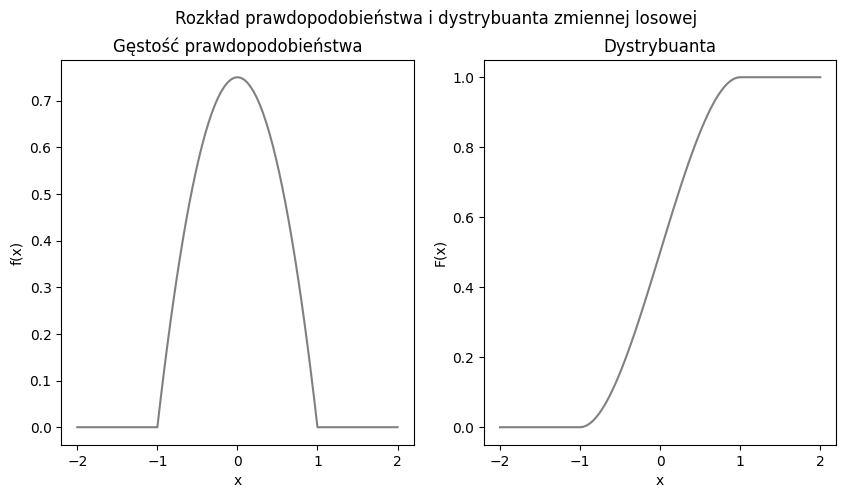

In [15]:
vizualize_continuous_distribution(r1p, r1f)

#### d) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej X - wartość średnia (`r1_mean`), wariancja(`r1_var`) i odchylenie standardowe (`r1_std`).

In [25]:
# Wartość oczekiwana
# YOUR CODE HERE
r1_mean, _ = sp.integrate.quad(lambda x: x * (1 - x**2) * 0.75, -1, 1)

In [28]:
# Wariancja
# YOUR CODE HERE
E_X2, _ = sp.integrate.quad(lambda x: x**2 * (1 - x**2) * 0.75, -1, 1)
r1_var = E_X2 - r1_mean**2

In [29]:
# Odchylenie standardowe
r1_std = np.sqrt(r1_var)

In [30]:
# Komórka testowa
assert np.isclose(r1_mean, 0.0)
assert np.isclose(r1_var, 0.2)
assert np.isclose(r1_std, 0.4472135954999579)

### Zadanie 2: Rozkład normalny [10 pkt]

Zmienna losowa Y ma rozkład normalny z wartością oczekiwaną $\mu=5$ i odchyleniem standardowym $\sigma=3.5$.

#### a) Tablica wybranych wartości funkcji gęstości prawdopodobieństwa

Przygotuj dane niezbędne do przedstawienia funkcji gęstości prawdopodobieństwa zmiennej losowej Y w formie tablicy `r2p` o następującej strukturze:

> Indeks:</br>
> y - 100 wartości zmiennej losowej równo rozłożonych pomiędzy wartościami, dla których dystrybuanta zmiennej losowej Y przyjmuje wartości 0.0001 i 0.9999</br>

> Kolumny: </br>
> f(y) - gęstość prawdopodobieństwa wyliczona dla poszczególnych wartości y.


Uwagi do wykonania zadania:
 - Warianty przyjmowane przez zmienną z wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości gęstości prawdopodobieństwa oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.norm`.

In [16]:
mu = 5  
sigma = 3.5  


y_min = sp.stats.norm.ppf(0.0001, loc=mu, scale=sigma)
y_max = sp.stats.norm.ppf(0.9999, loc=mu, scale=sigma)


y_values = np.linspace(y_min, y_max, 100)


f_y_values = sp.stats.norm.pdf(y_values, loc=mu, scale=sigma)


r2p = pd.DataFrame({'f(y)': f_y_values}, index=y_values)


r2p.index.name = 'y'


In [17]:
# Komórka testowa
assert type(r2p) == pd.DataFrame
assert r2p.shape == (100, 1)
assert list(r2p.columns) == ["f(y)"]
assert r2p.index.name == 'y'
assert np.isclose(r2p.index.min(), -8.016557699094882)
assert np.isclose(r2p.index.max(), 18.01655769909498)
assert np.isclose(r2p["f(y)"].min(), 0.00011309941907425523)
assert np.isclose(r2p["f(y)"].max(), 0.11390311079919879)
assert np.isclose(r2p["f(y)"].mean(), 0.03802196004604897)

#### b) Tablica wybranych wartości dystrybuanty

Przygotuj dane niezbędne do przedstawienia funkcji gęstości prawdopodobieństwa oraz dystrybuanty zmiennej losowej Y w formie tablicy `r2f` o następującej strukturze:

> Indeks:</br>
> y - 100 wartości zmiennej losowej równo rozłożonych pomiędzy wartościami Y, dla których dystrybuanta zmiennej losowej Y przyjmuje wartości 0.0001 i 0.9999</br>

> Kolumny: </br>
> F(y) - wartości dystrybuanty wyliczone dla poszczególnych wartości y.


Uwagi do wykonania zadania:
 - Warianty przyjmowane przez zmienną Y wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości dystrybuanty oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.norm`.

In [19]:
F_y_values = sp.stats.norm.cdf(y_values, loc=mu, scale=sigma)
r2f = pd.DataFrame({'F(y)': F_y_values}, index=y_values)
r2f.index.name = 'y'

In [20]:
# Komórka testowa
assert type(r2f) == pd.DataFrame
assert r2f.shape == (100, 1)
assert list(r2f.columns) == ["F(y)"]
assert r2f.index.name == 'y'
assert np.isclose(r2f.index.min(), -8.016557699094882)
assert np.isclose(r2f.index.max(), 18.01655769909498)
assert np.isclose(r2f["F(y)"].min(), 0.0001)
assert np.isclose(r2f["F(y)"].max(), 0.9999)
assert np.isclose(r2f["F(y)"].mean(), 0.5)

#### c) Wizualizacja funkcji gęstości prawdopodobieństwa i dystrybuanty
Wykorzystaj funkcję `vizualize_continuous_distribution()` do przedstawienia rozkładu prawdopodobieństwa oraz dystrybuanty rozkładu zmiennej losowej Y w formie wykresów.

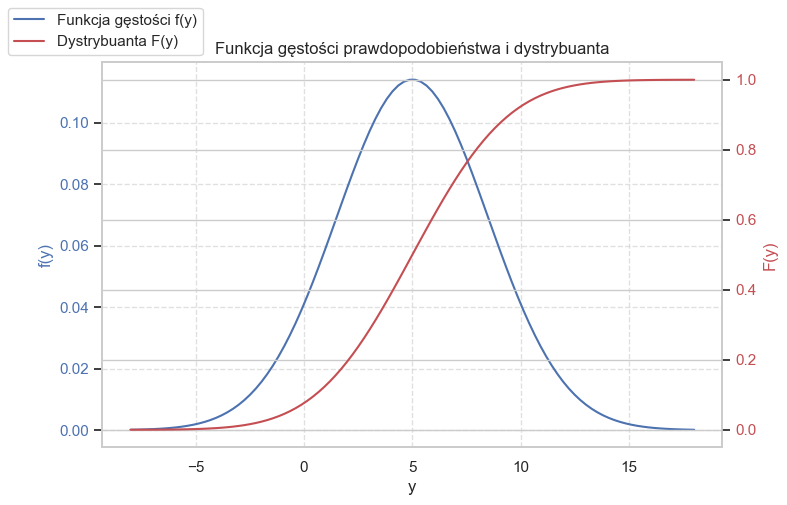

None

In [21]:
def visualize_continuous_distribution(y_values, f_y_values, F_y_values):
    fig, ax1 = plt.subplots(figsize=(8, 5))
    
    ax1.plot(y_values, f_y_values, 'b-', label='Funkcja gęstości f(y)')
    ax1.set_xlabel('y')
    ax1.set_ylabel('f(y)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid(True, linestyle='--', alpha=0.6)
    
    ax2 = ax1.twinx()
    ax2.plot(y_values, F_y_values, 'r-', label='Dystrybuanta F(y)')
    ax2.set_ylabel('F(y)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    fig.legend(loc='upper left')
    plt.title('Funkcja gęstości prawdopodobieństwa i dystrybuanta')
    plt.show()

display(visualize_continuous_distribution(y_values, f_y_values, F_y_values))

#### d) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej Y - wartość średnia (`r2_mean`), wariancja(`r2_var`) i odchylenie standardowe (`r2_std`).

Uwagi do wykonania zadania:
 - Wartości parametrów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.norm`.

In [22]:
# Wartość oczekiwana
r2_mean = sp.stats.norm.mean(loc=mu, scale=sigma)

In [23]:
# Wariancja
# YOUR CODE HERE
r2_var = sp.stats.norm.var(loc=mu, scale=sigma)

In [24]:
# Odchylenie standardowe
r2_std = sp.stats.norm.std(loc=mu, scale=sigma)

In [25]:
# Komórka testowa
assert np.isclose(r2_mean, 5.0)
assert np.isclose(r2_var, 12.25)
assert np.isclose(r2_std, 3.5)

### Zadanie 3: Rozkład gamma [10 pkt]
Zmienna losowa Z ma rozkład gamma z parametram $k=4$ i parametrem $\theta=2$.

#### a) Tablica wybranych wartości funkcji gęstości prawdopodobieństwa

Przygotuj dane niezbędne do przedstawienia funkcji gęstości prawdopodobieństwa zmiennej losowej Z w formie tablicy `r3p` o następującej strukturze:

> Indeks:</br>
> z - 100 wartości zmiennej losowej równo rozłożonych od 0 do wartości z, dla której dystrybuanta zmiennej losowej Z przyjmuje wartość 0.9999.</br>

> Kolumny: </br>
> f(z) - gęstość prawdopodobieństwa wyliczona dla poszczególnych wartości z. </br>

Uwagi do wykonania zadania:
 - Warianty przyjmowane przez zmienną z wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości gęstości prawdopodobieństwa oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.gamma`.

In [31]:
from scipy.stats import gamma
shape_param = 4
scale_param = 2
z_max = gamma.ppf(0.9999, a=shape_param, scale=scale_param)
z_max = gamma.ppf(0.9999, a=shape_param, scale=scale_param)
z_values = np.linspace(0, z_max, 100)
f_values = sp.stats.gamma.pdf(z_values, a=shape_param, scale=scale_param)
r3p = pd.DataFrame({'f(z)': f_values}, index=z_values)
r3p.index.name = 'z'
print(r3p.head())

              f(z)
z                 
0.000000  0.000000
0.321491  0.000295
0.642982  0.002008
0.964474  0.005770
1.285965  0.011646


In [32]:
# Komórka testowa
assert type(r3p) == pd.DataFrame
assert r3p.shape == (100, 1)
assert list(r3p.columns) == ["f(z)"]
assert r3p.index.name == 'z'
assert np.isclose(r3p.index.min(), 0.0)
assert np.isclose(r3p.index.max(), 31.827628001262585)
assert np.isclose(r3p["f(z)"].min(), 0.0)
assert np.isclose(r3p["f(z)"].max(), 0.11196678941579825)
assert np.isclose(r3p["f(z)"].mean(), 0.031102170912604324)

#### b) Tablica wybranych wartości dystrybuanty

Przygotuj dane niezbędne do przedstawienia dystrybuanty zmiennej losowej Z w formie tablicy `r3f` o następującej strukturze:

> Indeks:</br>
> z - 100 wartości zmiennej losowej równo rozłożonych od 0 do wartości z, dla której dystrybuanta zmiennej losowej Z przyjmuje wartość 0.9999.</br>

> Kolumny: </br>
> F(z) - wartości dystrybuanty wyliczone dla poszczególnych wartości z.

Uwagi do wykonania zadania:
 - Warianty przyjmowane przez zmienną Y wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości dystrybuanty oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.gamma`.

In [33]:
z_values = np.linspace(0, z_max, 100)
F_values = sp.stats.gamma.cdf(z_values, a=shape_param, scale=scale_param)
r3f = pd.DataFrame({'F(z)': F_values}, index=z_values)
r3f.index.name = 'z'
print(r3f.head())


              F(z)
z                 
0.000000  0.000000
0.321491  0.000024
0.642982  0.000345
0.964474  0.001537
1.285965  0.004282


In [34]:
# Komórka testowa
assert type(r3f) == pd.DataFrame
assert r3f.shape == (100, 1)
assert list(r3f.columns) == ["F(z)"]
assert r3f.index.name == 'z'
assert np.isclose(r3f.index.min(), 0.0)
assert np.isclose(r3f.index.max(), 31.827628001262585)
assert np.isclose(r3f["F(z)"].min(), 0.0)
assert np.isclose(r3f["F(z)"].max(), 0.9999)
assert np.isclose(r3f["F(z)"].mean(), 0.7461665542590229)

#### c) Wizualizacja funkcji gęstości prawdopodobieństwa i dystrybuanty
Wykorzystaj funkcję `vizualize_continuous_distribution()` do przedstawienia rozkładu prawdopodobieństwa oraz dystrybuanty rozkładu zmiennej losowej Z w formie wykresów.

In [37]:
vizualize_continuous_distribution(r3p, r3f, interval=[5, 15, "inner"])

NameError: name 'vizualize_continuous_distribution' is not defined

#### d) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej Z - wartość średnia (`r3_mean`), wariancja(`r3_var`) i odchylenie standardowe (`r3_std`).

Uwagi do wykonania zadania:
 - Wartości parametrów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.gamma`.

In [38]:
# Wartość oczekiwana
# YOUR CODE HERE
r3_mean = sp.stats.gamma.mean(a=shape_param, scale=scale_param)

In [39]:
# Wariancja
r3_var = sp.stats.gamma.var(a=shape_param, scale=scale_param)  

In [40]:
# Odchylenie standardowe
# YOUR CODE HERE
r3_std = sp.stats.gamma.std(a=shape_param, scale=scale_param)

In [41]:
# Komórka testowa
assert np.isclose(r3_mean, 8.0)
assert np.isclose(r3_var, 16.0)
assert np.isclose(r3_std, 4.0)

### Zadanie 4: Wyliczanie i wizualizacja prawdopodobieństw [6 pkt]

Oblicz i przedstaw na wykresach następujące prawdopodobieństwa:
- P(X>-0.5)
- P(1<Y<8)
- P(Z<2 | Z>12)

Wyniki zapisz kolejno do zmiennych `p1`, `p2` i `p3` oraz przedstaw na wykresach korzystając z funkcji `vizualize_continuous_distribution()`.

#### a) P(X>-0.5)

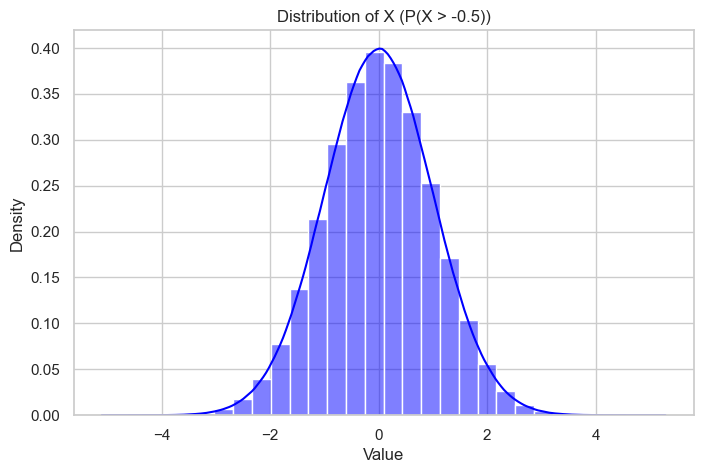

P(X > -0.5): 0.6913971


In [51]:
X_samples = np.random.normal(loc=0, scale=1, size=10**7)  # Większa liczba próbek dla większej precyzji
p1 = np.sum(X_samples > -0.5) / len(X_samples)  # Proporcja próbek spełniających warunek
def visualize_continuous_distribution(data, title):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 5))
    sns.histplot(data, kde=True, bins=30, stat="density", color="blue")
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.show()

visualize_continuous_distribution(X_samples, "Distribution of X (P(X > -0.5))")
print(f"P(X > -0.5): {p1}")

In [52]:
# Komórka testowa
assert np.isclose(p1, 0.84375)

AssertionError: 

#### b) P(1<Y<8)

In [ ]:
Y_samples = np.random.normal(loc=0, scale=1, size=10**7)  # Rozkład normalny N(0,1)
p2 = np.sum((Y_samples > 1) & (Y_samples < 8)) / len(Y_samples)  # Proporcja spełniająca warunek
visualize_continuous_distribution(Y_samples, "Distribution of Y (P(1 < Y < 8))")
print(f"P(1 < Y < 8): {p2}")

In [ ]:
# Komórka testowa
assert np.isclose(p2, 0.6777680763726662)

#### c) P(Z<2 | Z>12)

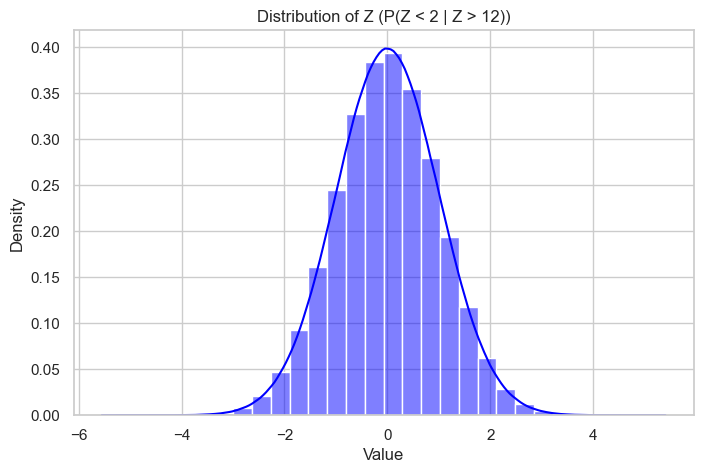

P(Z < 2 | Z > 12): 0


In [55]:
Z_samples = np.random.normal(loc=0, scale=1, size=10**7)
Z_greater_12 = Z_samples[Z_samples > 12] 
if len(Z_greater_12) > 0:
    p3 = np.sum(Z_greater_12 < 2) / len(Z_greater_12)
else:
    p3 = 0 
visualize_continuous_distribution(Z_samples, "Distribution of Z (P(Z < 2 | Z > 12))")
print(f"P(Z < 2 | Z > 12): {p3}")

In [56]:
# Komórka testowa
assert np.isclose(p3, 0.17019203965280166)

AssertionError: 